___
## BASELINE MODEL
- Run baseline without imputing data to have a basic understanding about features
- Using LGB since it can deal with missing values and categorical variables

Reference:

https://www.kaggle.com/jayjay75/wids2020-lgb-starter-adversarial-validation

https://www.kaggle.com/dansbecker/shap-values

____

### Import Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

import datetime, warnings, scipy 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from collections import Counter
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
# mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

# sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import lightgbm
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import brier_score_loss


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

# warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Set standard parameters
pd.options.display.float_format = '{:.2f}'.format
# pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', -1)

In [2]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
!ls "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
Deep_Learning_Project  Healthcare  ML_Project


In [0]:
df = pd.read_csv('/content/drive/My Drive/Healthcare/Data/training_v2.csv', low_memory = False)
dictionary = pd.read_csv('/content/drive/My Drive/Healthcare/Data/WiDS Datathon 2020 Dictionary.csv')

___
### DROP UNNESCESSARY COLUMNS


In [0]:
df.readmission_status.unique()

array([0])

In [0]:
keep_cols = dictionary[dictionary['Variable Name'].str.contains("h1_") == False]['Variable Name'].tolist()
drop_cols = {'icu_admit_type', 'readmission_status', 'pred'} 
keep_cols = [x for x in keep_cols if x not in drop_cols] 

In [0]:
keep_cols

In [0]:
df_clean = df[keep_cols]
df_clean.head()

,encounter_id,hospital_id,patient_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,118,25312,0,68.0,22.7,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.5,73.9,2.3,113.0,502.0,0,0.0,0.4,31.0,2.5,nan,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,nan,nan,nan,nan,36.0,134.0,39.3,nan,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.5,2.2,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,nan,nan,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,81,59342,0,77.0,27.4,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.9,70.2,nan,108.0,203.0,0,0.0,nan,9.0,0.6,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.5,33.0,145.0,35.1,nan,1.0,12.7,nan,nan,95.0,31.0,95.0,31.0,118.0,72.0,nan,nan,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,nan,nan,159.0,67.0,159.0,67.0,36.3,35.1,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.7,0.6,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,1.3,1.3,3.5,3.5,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,37.0,37.0,7.5,7.5,51.0,51.0,54.8,51.0,0.5,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,118,50777,0,25.0,31.9,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.0,95.3,nan,122.0,703.0,0,0.0,nan,nan,nan,nan,3.0,6.0,0.0,5.0,nan,102.0,nan,0.0,68.0,nan,nan,nan,nan,37.0,nan,36.7,nan,0.0,nan,nan,nan,88.0,48.0,88.0,48.0,96.0,68.0,nan,nan,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,nan,nan,148.0,105.0,148.0,105.0,37.0,36.7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,118,46918,0,81.0,22.6,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.0,61.7,nan,203.0,1206.0,1,0.0,nan,nan,nan,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.4,4.0,nan,34.8,nan,1.0,8.0,62.0,30.0,48.0,42.0,48.0,42.0,116.0,92.0,92.0,52.0,84.0,84.0,84.0,84.0,23.0,7.0,1

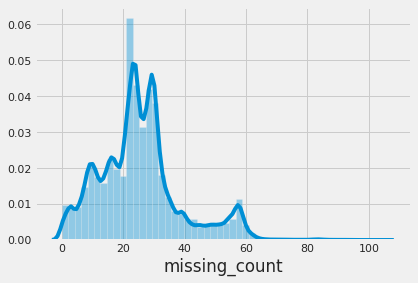

In [0]:
df_clean['missing_count']=df_clean.isnull().sum(axis =1)
sns.distplot(df_clean.missing_count, kde = True)

In [0]:
df_clean.to_csv('/content/drive/My Drive/Healthcare/Data/df_clean.csv')

#### HOSPITAL_ID - QUICK CHECK


In [0]:
df_clean = pd.read_csv('/content/drive/My Drive/Healthcare/Data/df_clean.csv', low_memory = False, index_col= 0)

In [0]:
df_clean.shape

(91713, 121)

In [0]:
df_clean.head(3)

,encounter_id,hospital_id,patient_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,118,25312,0,68.0,22.7,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.5,73.9,2.3,113.0,502.0,0,0.0,0.4,31.0,2.5,nan,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,nan,nan,nan,nan,36.0,134.0,39.3,nan,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.5,2.2,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,nan,nan,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,81,59342,0,77.0,27.4,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.9,70.2,nan,108.0,203.0,0,0.0,nan,9.0,0.6,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.5,33.0,145.0,35.1,nan,1.0,12.7,nan,nan,95.0,31.0,95.0,31.0,118.0,72.0,nan,nan,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,nan,nan,159.0,67.0,159.0,67.0,36.3,35.1,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.7,0.6,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,1.3,1.3,3.5,3.5,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,37.0,37.0,7.5,7.5,51.0,51.0,54.8,51.0,0.5,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,118,50777,0,25.0,31.9,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.0,95.3,nan,122.0,703.0,0,0.0,nan,nan,nan,nan,3.0,6.0,0.0,5.0,nan,102.0,nan,0.0,68.0,nan,nan,nan,nan,37.0,nan,36.7,nan,0.0,nan,nan,nan,88.0,48.0,88.0,48.0,96.0,68.0,nan,nan,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,nan,nan,148.0,105.0,148.0,105.0,37.0,36.7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic


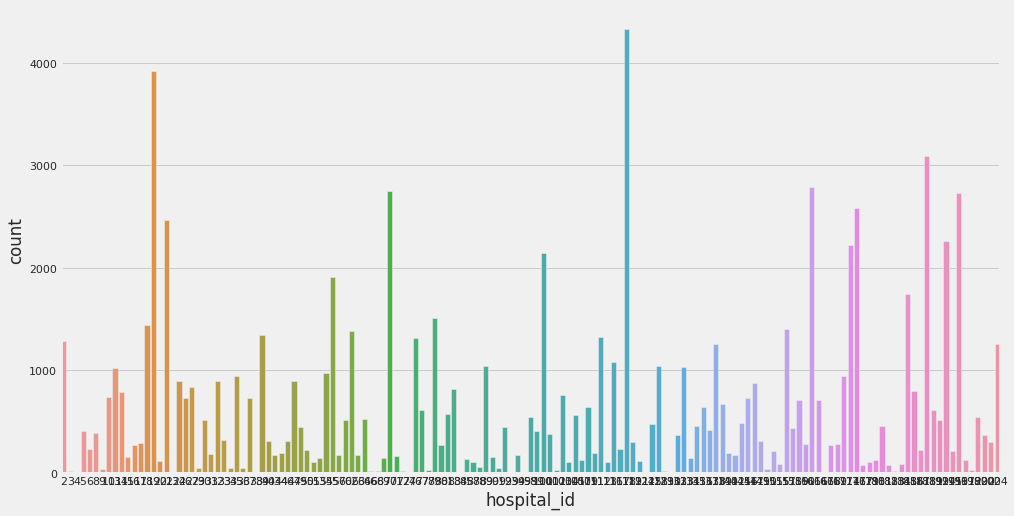

In [0]:
plt.figure(figsize=(15, 8))
sns.countplot(x= 'hospital_id', data = df_clean)

In [0]:
byhospital =df.groupby(['hospital_id']).agg({'hospital_death':['sum','count']}).reset_index()
byhospital['death_rate']=np.round(byhospital['hospital_death']['sum']/byhospital['hospital_death']['count']*100,2)
byhospital.sort_values('death_rate',ascending = False)

hospital_id hospital_death       death_rate
                           sum count           
95   130         1              2    50.0      
39   51          32             110  29.1      
112  155         19             92   20.6      
21   29          9              50   18.0      
106  145         88             492  17.9      
55   76          208            1312 15.8      
52   71          25             168  14.9      
9    14          115            792  14.5      
24   32          130            902  14.4      
17   23          1              7    14.3      
131  184         12             84   14.3      
110  150         5              36   13.9      
75   100         293            2141 13.7      
76   101         52             381  13.7      
49   68          2              15   13.3      
124  176         344            2583 13.3      
125  177         10             81   12.3      
18   24          108            897  12.0      
82   109         77             641  12.0      
128  181         55             459  12.0      
69   92          53             448  11.8      
16   21          291            2470 11.8      
15   20          14             119  11.8      
57   78          4              34   11.8      
77   102         4              34   11.8      
19   26          86             736  11.7      
36   47          104            894  11.6      
138  194         260            2258 11.5      
74   99          47             412  11.4      
7    10          84             740  11.3      
28   36          6              53   11.3      
146  204         141            1261 11.2      
73   98          60             542  11.1      
123  174         243            2225 10.9      
3    5           43             414  10.4      
66   89          108            1042 10.4      
108  147         90             877  10.3      
133  186         82             799  10.3      
126  179         11             108  10.2      
14   19          394            3925 10.0      
26   34          5              50   10.0      
119  167         1              10   10.0      
13   18          141            1442 9.8       
12   17          28             293  9.6       
144  200         35             367  9.5       
71   94          17             179  9.5       
96   132         35             369  9.5       
97   133         97             1032 9.4       
107  146         68             729  9.3       
129  182         7              77   9.1       
32   40          27             308  8.8       
141  197         11             127  8.7       
44   60          45             522  8.6       
51   70          237            2754 8.6       
11   16          23             272  8.5       
117  161         234            2792 8.4       
140  196         228            2730 8.3       
62   84          1              12   8.3       
37   49          37             450  8.2       
65   88          5              61   8.2       
58   79          123            1510 8.2       
102  138         102            1260 8.1       
135  188         248            3095 8.0       
113  157         111            1402 7.9       
100  136         51             645  7.9       
86   116         85             1081 7.9       
116  160         22             284  7.8       
54   74          1              13   7.7       
80   105         43             563  7.6       
61   83          62             820  7.6       
121  169         21             280  7.5       
136  189         45             611  7.4       
45   62          101            1386 7.3       
20   27          61             839  7.3       
99   135         33             460  7.2       
81   107         9              127  7.1       
88   118         306            4333 7.1       
40   53          10             143  7.0       
89   119         21             303  6.9       
142  198         2              29   6.9       
31   39          93             1349 6.9       
145  202         21 

__Assumption: We want to make the model more granular, therefore hospital_id should not be take into account as a feature in the models. Also, some hospital only have less than 10 patients >> make noise for the prediction if we keep this feature__


____
### SPLIT DATA & CHECK DISTRIBUTION OF TRAIN VS. TEST


In [0]:
comorbidity =['cirrhosis','diabetes_mellitus','hepatic_failure','immunosuppression','leukemia','lymphoma','solid_tumor_with_metastasis','elective_surgery','aids']
for i in comorbidity:
  df_clean[i]=df_clean[i].astype('category')

demo = ['ethnicity','gender','hospital_admit_source','icu_stay_type','icu_admit_source','icu_type'] 
for i in demo:
  df_clean[i]=df_clean[i].astype('category')


gcs = ['gcs_eyes_apache','gcs_motor_apache','gcs_verbal_apache','gcs_unable_apache']
for i in gcs:
  df_clean[i]=df_clean[i].astype('category')


for i in ['intubated_apache','arf_apache','ventilated_apache']:
  df_clean[i]=df_clean[i].astype('category')

df_clean['apache_3j_bodysystem'] =df_clean['apache_3j_bodysystem'].astype('category')
df_clean['apache_3j_diagnosis'] =df_clean['apache_3j_diagnosis'].astype('category')
df_clean['apache_post_operative'] =df_clean['apache_post_operative'].astype('category')

In [0]:
cols = ['age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'weight',
 'albumin_apache',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'd1_albumin_max',
 'd1_albumin_min',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_calcium_max',
 'd1_calcium_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_glucose_max',
 'd1_glucose_min',
 'd1_hco3_max',
 'd1_hco3_min',
 'd1_hemaglobin_max',
 'd1_hemaglobin_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_inr_max',
 'd1_inr_min',
 'd1_lactate_max',
 'd1_lactate_min',
 'd1_platelets_max',
 'd1_platelets_min',
 'd1_potassium_max',
 'd1_potassium_min',
 'd1_sodium_max',
 'd1_sodium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'd1_arterial_pco2_max',
 'd1_arterial_pco2_min',
 'd1_arterial_ph_max',
 'd1_arterial_ph_min',
 'd1_arterial_po2_max',
 'd1_arterial_po2_min',
 'd1_pao2fio2ratio_max',
 'd1_pao2fio2ratio_min',
 'apache_4a_hospital_death_prob',
 'apache_4a_icu_death_prob',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'apache_3j_bodysystem']

In [0]:
from sklearn.model_selection import train_test_split

X = df_clean[cols]
y = df_clean['hospital_death']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=911)

In [0]:
# Check predictor percentage 
stratify = {
    'total': pd.Series(y),
    'train': pd.Series(y_train),
    'test': pd.Series(y_test)
}

pd.DataFrame(stratify).apply(pd.value_counts).apply(lambda col: col/col.sum()*100)

,total,train,test
0.0,91.4,91.4,91.4
1.0,8.6,8.6,8.6


[Text(0, 0, 'Emergency Department'),
 Text(0, 0, 'Operating Room'),
 Text(0, 0, 'Floor'),
 Text(0, 0, 'Direct Admit'),
 Text(0, 0, 'Recovery Room'),
 Text(0, 0, 'Acute Care/Floor'),
 Text(0, 0, 'Step-Down Unit (SDU)'),
 Text(0, 0, 'Other Hospital'),
 Text(0, 0, 'PACU'),
 Text(0, 0, 'Other ICU'),
 Text(0, 0, 'ICU to SDU'),
 Text(0, 0, 'Chest Pain Center'),
 Text(0, 0, 'ICU'),
 Text(0, 0, 'Observation'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'nan')]

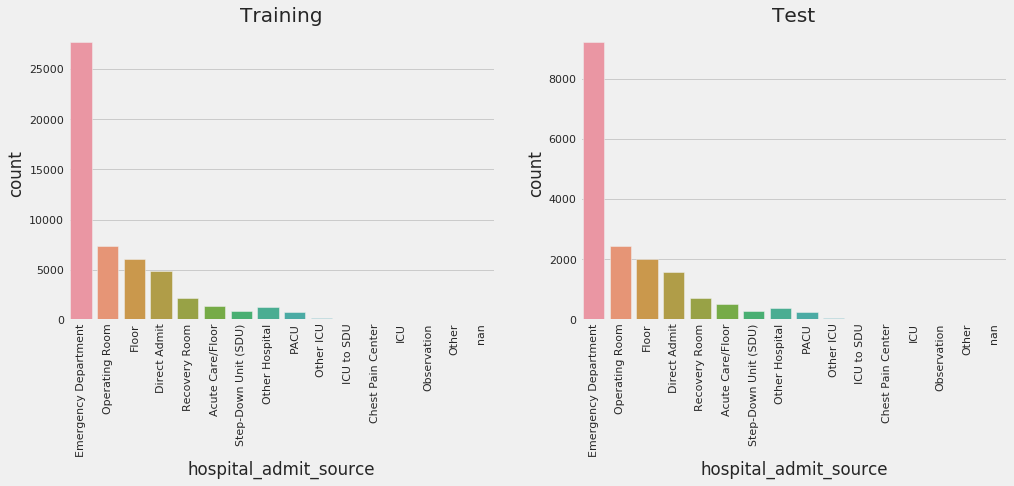

In [0]:
# X_train.hospital_admit_source.unique().tolist()
ord = ['Emergency Department','Operating Room','Floor','Direct Admit','Recovery Room','Acute Care/Floor',
       'Step-Down Unit (SDU)','Other Hospital','PACU','Other ICU','ICU to SDU','Chest Pain Center','ICU',
       'Observation','Other','nan']

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
chart1 = sns.countplot(x = 'hospital_admit_source', data = X_train,order=ord, ax = ax[0])
chart1.set_title('Training')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
chart2 = sns.countplot(x = 'hospital_admit_source', data = X_test, order = ord, ax = ax[1])
chart2.set_title('Test')
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)

[Text(0, 0, 'Cardiovascular'),
 Text(0, 0, 'Neurological'),
 Text(0, 0, 'Sepsis'),
 Text(0, 0, 'Respiratory'),
 Text(0, 0, 'Gastrointestinal'),
 Text(0, 0, 'Metabolic'),
 Text(0, 0, 'Trauma'),
 Text(0, 0, 'Genitourinary'),
 Text(0, 0, 'Musculoskeletal/Skin'),
 Text(0, 0, 'Hematological'),
 Text(0, 0, 'Gynecological'),
 Text(0, 0, 'nan')]

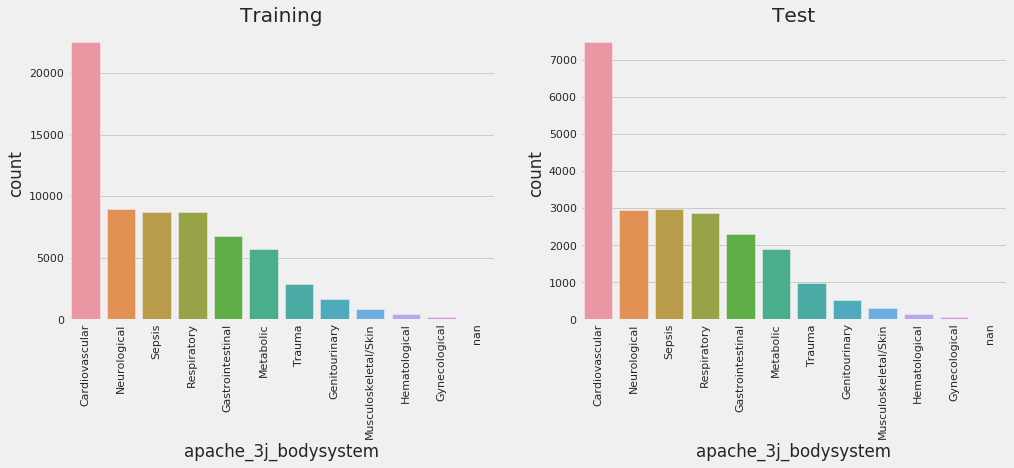

In [0]:
# X_train.apache_3j_bodysystem.unique().tolist()
ord = [ 'Cardiovascular','Neurological', 'Sepsis', 'Respiratory', 'Gastrointestinal', 'Metabolic',
       'Trauma','Genitourinary','Musculoskeletal/Skin','Hematological', 'Gynecological', 'nan']

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
chart1 = sns.countplot(x = 'apache_3j_bodysystem', data = X_train, order = ord, ax = ax[0])
chart1.set_title('Training')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
chart2 = sns.countplot(x = 'apache_3j_bodysystem', data = X_test, order = ord, ax = ax[1])
chart2.set_title('Test')
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

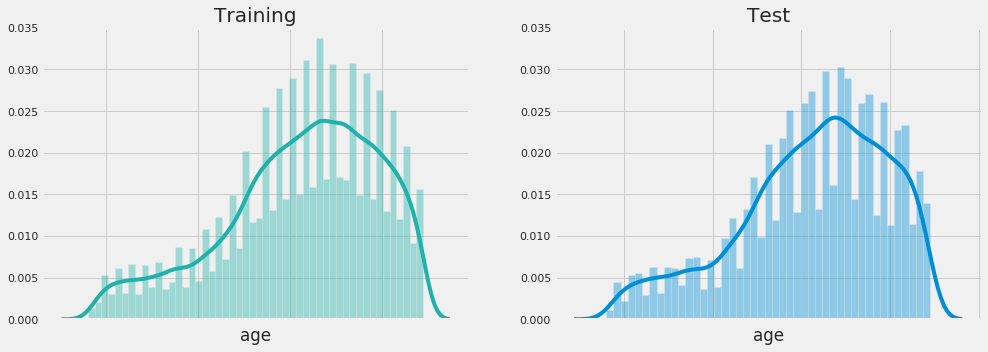

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
chart1 = sns.distplot(X_train.age, kde = True, ax = ax[0], color = 'lightseagreen')
chart1.set_title('Training')
chart1.set_ylim([0, 0.035])
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
chart2 = sns.distplot(X_test.age, kde=True, ax = ax[1])
chart2.set_title('Test')
chart2.set_ylim([0, 0.035])
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)

[Text(0, 0, 'Caucasian'),
 Text(0, 0, 'African American'),
 Text(0, 0, 'Other/Unknown'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'Native American'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'nan')]

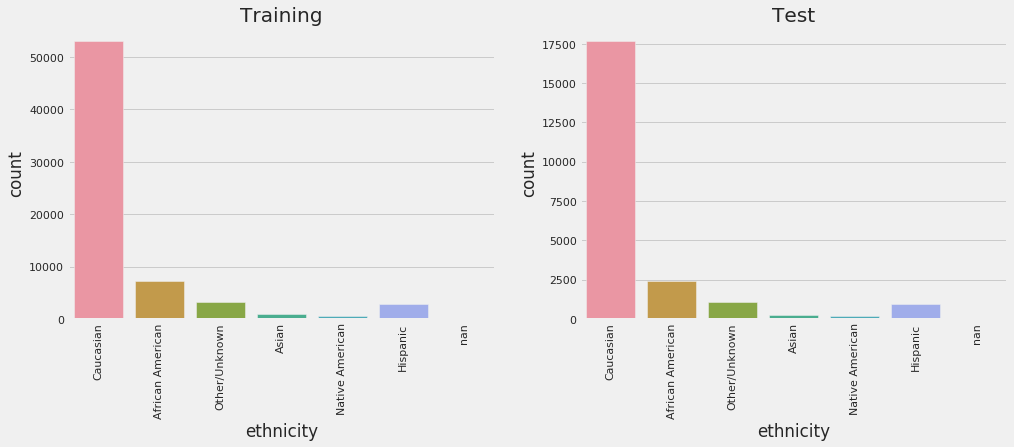

In [0]:
# X_train.ethnicity.unique().tolist()
ord = ['Caucasian', 'African American','Other/Unknown','Asian',
 'Native American','Hispanic', 'nan']

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
chart1 = sns.countplot(x = 'ethnicity', data = X_train, order = ord, ax = ax[0])
chart1.set_title('Training')
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
chart2 = sns.countplot(x = 'ethnicity', data = X_test, order = ord, ax = ax[1])
chart2.set_title('Test')
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)

In [0]:
df_clean.select_dtypes(include='O').columns.values.tolist()

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

### Label Encoding

In [0]:
cat_cols =  X_train.select_dtypes(include='O').columns.values.tolist()
for col in cat_cols: 
    if col in X_train.columns: 
        le = LabelEncoder() 
        le.fit(list(X_train[col].astype(str).values) + list(X_test[col].astype(str).values)) 
        X_train[col] = le.transform(list(X_train[col].astype(str).values)) 
        X_test[col] = le.transform(list(X_test[col].astype(str).values)) 

In [0]:
cat_cols

['elective_surgery',
 'ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'apache_3j_bodysystem']

___
### ROC_AUC

In [0]:
def plot_feature_importance(df, k_fold_object):
    df['average_feature_imp'] = df[['fold_{}'.format(fold + 1) for fold in range(k_fold_object.n_splits)]].mean(axis=1)
    plt.figure(figsize=(10, 40))
    sns.barplot(data=df.sort_values(by='average_feature_imp', ascending=False), x='average_feature_imp', y='feature');
    plt.title('Feature importance over {} folds average'.format(k_fold_object.n_splits))
    plt.show()

In [0]:
# Parameters
params = {"objective": "binary", 
          "boosting": "goss",
          "class_weight": 'balanced',
          "metric": "auc",
          "n_jobs":-1,
          "verbose":-1}

num_folds = 10
roc_auc = list()
feature_importances = pd.DataFrame()
feature_importances['feature'] = X_train.columns
pred_on_test = np.zeros(X_test.shape[0])


kf = StratifiedKFold(n_splits=num_folds,shuffle=True, random_state=911)
for index, (train_index, valid_index) in enumerate(kf.split(X=X_train,y=y_train)):
    print(f"FOLD {index+1}")

    X_train_fold, y_train_fold = X_train.iloc[train_index], y_train.iloc[train_index]
    X_valid_fold, y_valid_fold = X_train.iloc[valid_index], y_train.iloc[valid_index]

    dtrain = lightgbm.Dataset(X_train_fold, label=y_train_fold)
    dvalid = lightgbm.Dataset(X_valid_fold, label=y_valid_fold)

    lgb = lightgbm.train(params=params, train_set=dtrain, num_boost_round=2000, 
                         valid_sets=[dtrain, dvalid], verbose_eval=250, early_stopping_rounds=500)

    feature_importances[f'fold_{index + 1}'] = lgb.feature_importance()

    y_valid_pred = (lgb.predict(X_valid_fold,num_iteration=lgb.best_iteration))
    pred_on_test += (lgb.predict(X_test,num_iteration=lgb.best_iteration)) / num_folds

    # winsorization
    y_valid_pred = np.clip(a=y_valid_pred, a_min=0, a_max=1)
    pred_on_test = np.clip(a=pred_on_test, a_min=0, a_max=1)

    print(f"FOLD {index+1}: ROC_AUC  => {np.round(roc_auc_score(y_true=y_valid_fold, y_score=y_valid_pred),5)}")
    roc_auc.append(roc_auc_score(y_true=y_valid_fold, y_score=y_valid_pred)/num_folds)
    
print(f"Mean roc_auc for {num_folds} folds: {np.round(sum(roc_auc),5)}")

FOLD 1
Training until validation scores don't improve for 500 rounds.
[250]	training's auc: 0.988891	valid_1's auc: 0.903026
[500]	training's auc: 0.999188	valid_1's auc: 0.901879
Early stopping, best iteration is:
[80]	training's auc: 0.951397	valid_1's auc: 0.905461
FOLD 1: ROC_AUC  => 0.90546
FOLD 2
Training until validation scores don't improve for 500 rounds.
[250]	training's auc: 0.988732	valid_1's auc: 0.900185
[500]	training's auc: 0.999	valid_1's auc: 0.895329
Early stopping, best iteration is:
[123]	training's auc: 0.966651	valid_1's auc: 0.902476
FOLD 2: ROC_AUC  => 0.90248
FOLD 3
Training until validation scores don't improve for 500 rounds.
[250]	training's auc: 0.989211	valid_1's auc: 0.901214
[500]	training's auc: 0.999259	valid_1's auc: 0.899827
Early stopping, best iteration is:
[117]	training's auc: 0.964203	valid_1's auc: 0.903164
FOLD 3: ROC_AUC  => 0.90316
FOLD 4
Training until validation scores don't improve for 500 rounds.
[250]	training's auc: 0.989636	valid_1's

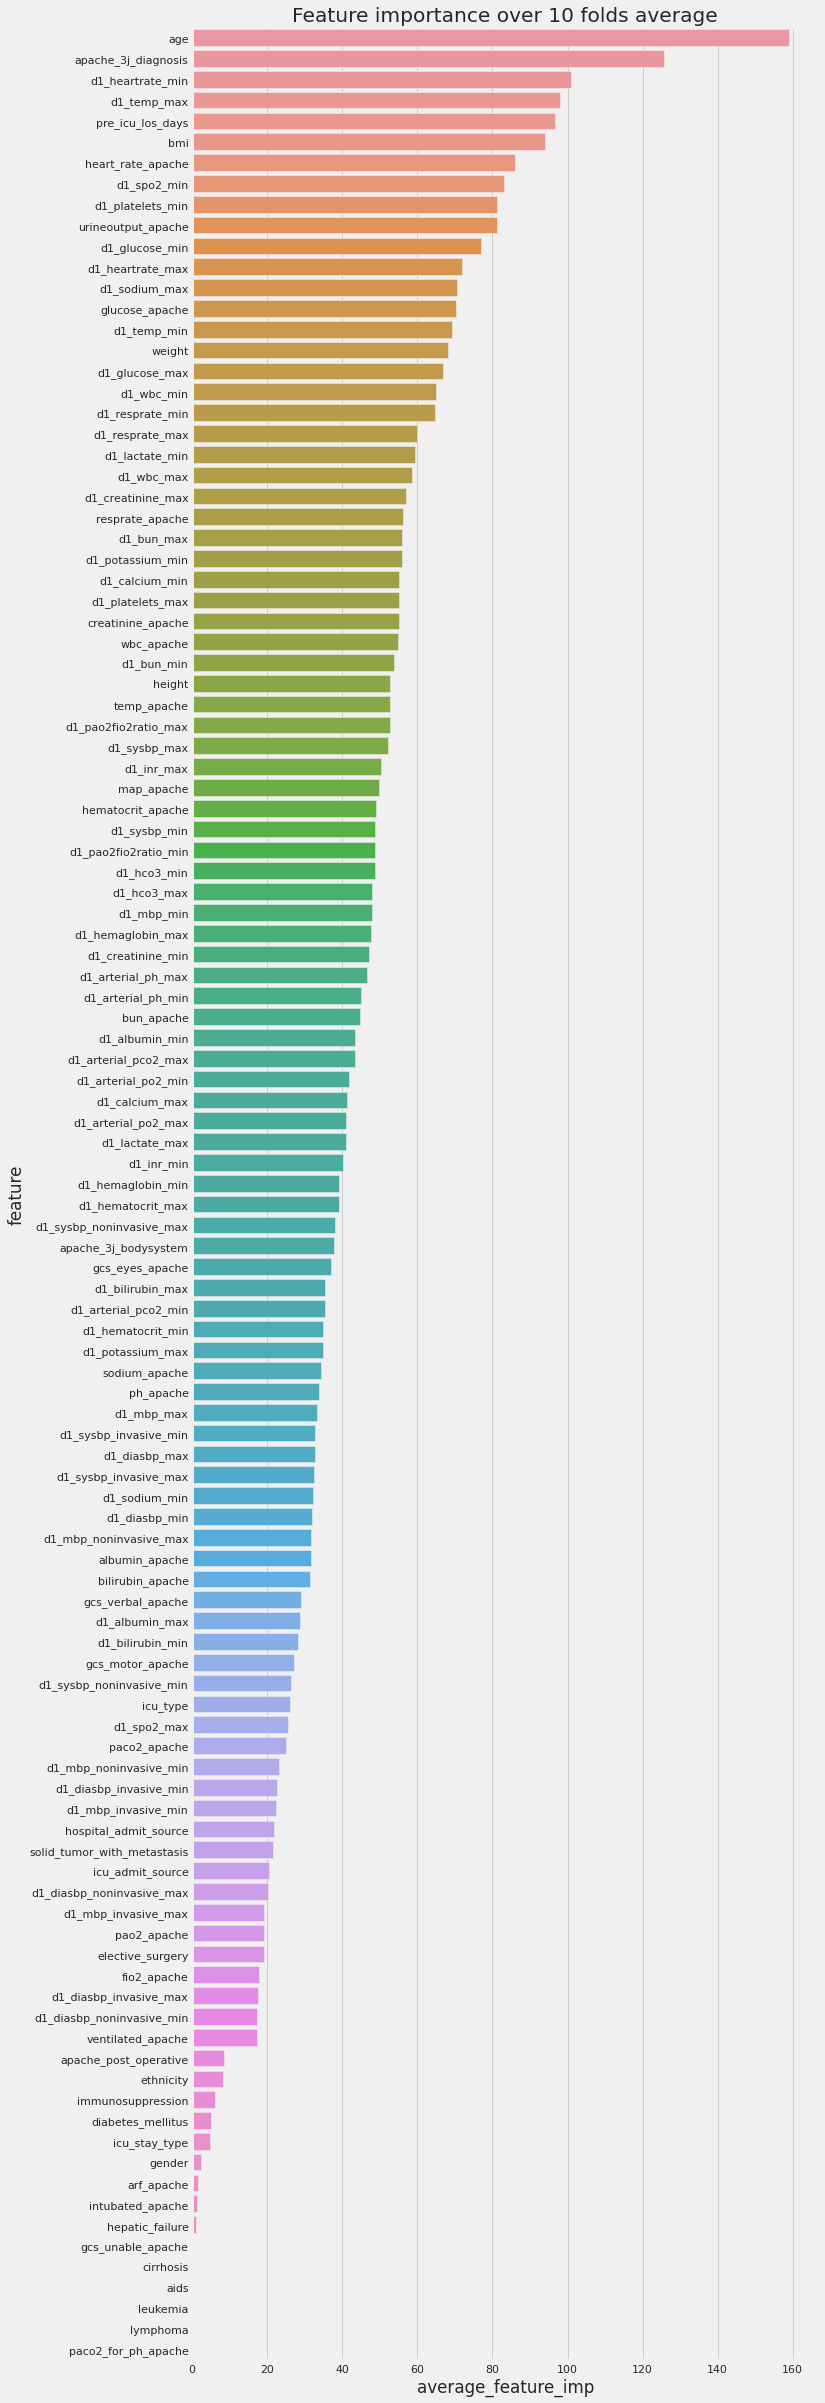

In [0]:
plot_feature_importance(df=feature_importances, k_fold_object=kf)

___
### SHAPLEY EXPLANATOR

In [0]:
! pip install shap

In [0]:
import lightgbm as lgb
def run_lgb(train_X, train_y, val_X, val_y, test_X=None):
    params = {"objective": "binary", 
          "boosting": "goss",
          "class_weight": 'balanced',
          "metric": "auc",
          "n_jobs":-1,
          "verbose":-1}
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 5000, 
                      valid_sets=[lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=200, 
                      evals_result=evals_result)
    
    if test_X is not None:
        pred_test_y = np.expm1(model.predict(test_X, num_iteration=model.best_iteration))
        return pred_test_y, model, evals_result
    else:
        return model, evals_result

#pred_test, model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y, feature_df.iloc[test_idx])
model, evals_result = run_lgb(X_train, y_train, X_test, y_test)
print("LightGBM Training Completed...")

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.897266
Early stopping, best iteration is:
[121]	valid_0's auc: 0.898263
LightGBM Training Completed...


In [0]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# # load JS visualization code to notebook
shap.initjs()
# # visualize the first prediction's explanation
# SHAP plots for all the data is very slow, so we'll only do it for a sample. Taking the head instead of a random sample is dangerous! 
shap.force_plot(explainer.expected_value[1],shap_values[0][:40000][1], X_train.iloc[0,:40000])

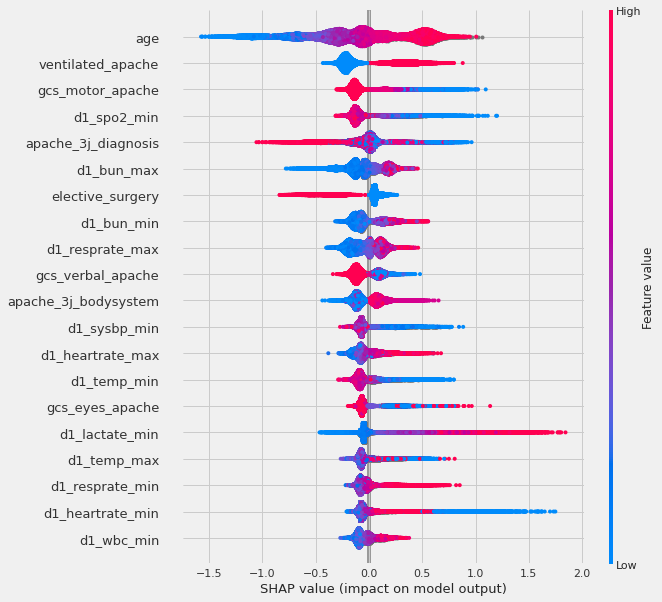

In [0]:
# summarize the effects of all the features
shap.summary_plot(shap_values[1], X_train)